# Tarea 1

Diego Lozoya Morales | 745345

Crea una regresión lineal con los demás inputs numericos

'housing_median_age', 'total_rooms',
'total_bedrooms', 'population', 'households'

- Realiza un analisis bivariado de cada uno de estos
- Escribe la ecuación del modelo 
- Obtener R2 y mean squared error
- Grafica las predicciones 

Responde la pregunta: ¿Cuál es el mejor modelo de estos? ¿Por qué?

## Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

colors = ["cornflowerblue", "indianred"]

## Data

In [2]:
df = pd.read_csv('Data/housing.csv')

df = df[df.median_house_value != df.median_house_value.max()]

df["total_bedrooms"] = df.total_bedrooms.fillna(df.total_bedrooms.mean())

del df["ocean_proximity"]

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Regressions

In [3]:
y = df['median_house_value']

### Housing median age

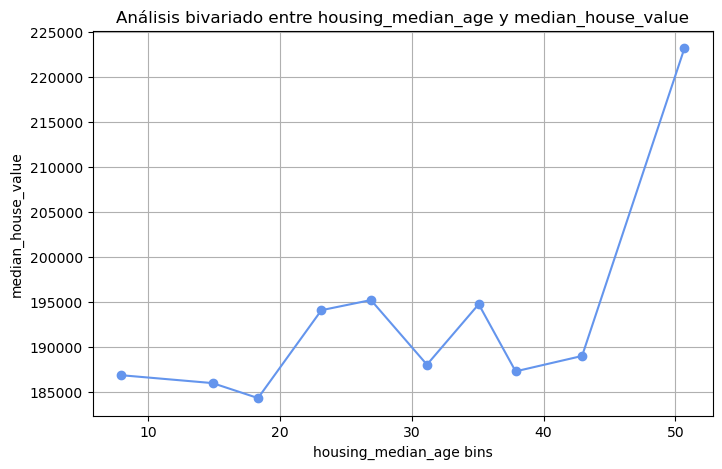

R² Score: 0.0046
MSE: 9,502,976,334.7060
La ecuación de la regresión es: 530.7537 * housing_median_age + (177,411.7981)


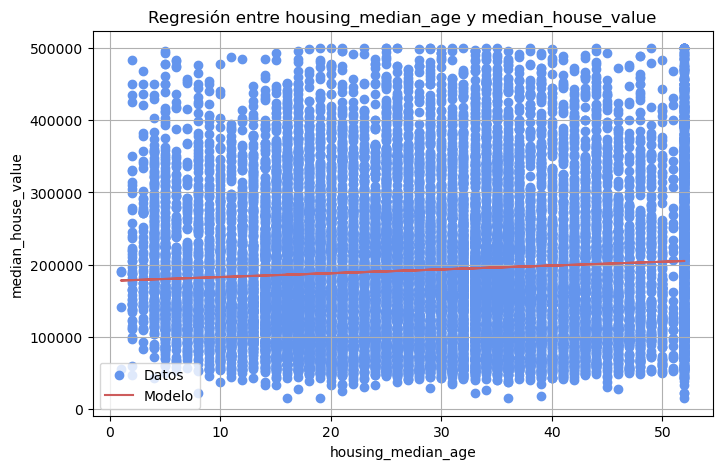

In [4]:
X = df[['housing_median_age']]
model = linear_model.LinearRegression().fit(X, y)

df[X.keys()[0] + str("bin")] = pd.qcut(df[X.keys()[0]], q=10, labels=False) + 1
grouped_age = df.groupby((X.keys()[0] + str("bin"))).mean()

plt.figure(figsize=(8,5))
plt.plot(grouped_age[X.keys()[0]].values, grouped_age.median_house_value.values, color=colors[0], marker='o')
plt.xlabel(f"{X.keys()[0]} bins")
plt.ylabel("median_house_value")
plt.title(f"Análisis bivariado entre {X.keys()[0]} y median_house_value")
plt.grid()
plt.show()

r2 = r2_score(y_true=y, y_pred=model.predict(X))
print(f"R² Score: {r2:.4f}")

mse = mean_squared_error(y_true=y, y_pred=model.predict(X))
print(f"MSE: {mse:,.4f}")

print(f"La ecuación de la regresión es: {model.coef_[0]:,.4f} * {X.keys()[0]} + ({model.intercept_:,.4f})")

plt.figure(figsize=(8,5))
plt.scatter(df[X.keys()], df['median_house_value'], color=colors[0], label="Datos")
plt.plot(X, model.predict(X), color=colors[1], label="Modelo")
plt.xlabel(f"{X.keys()[0]}")
plt.ylabel("median_house_value")
plt.title(f"Regresión entre {X.keys()[0]} y median_house_value")
plt.grid()
plt.legend()
plt.show()


La edad mediana de la casa es una mala variable de predicción, ya que las variables de edad mediana y precio mediano no tienen una relación lineal, por como se puede ver en el análisis vibariado. Además tiene un R2 de únicamente 0.0046. Gráficmanete, también se puede ver un mal ajuste de la regresión con la distribución de los datos.

### Total rooms

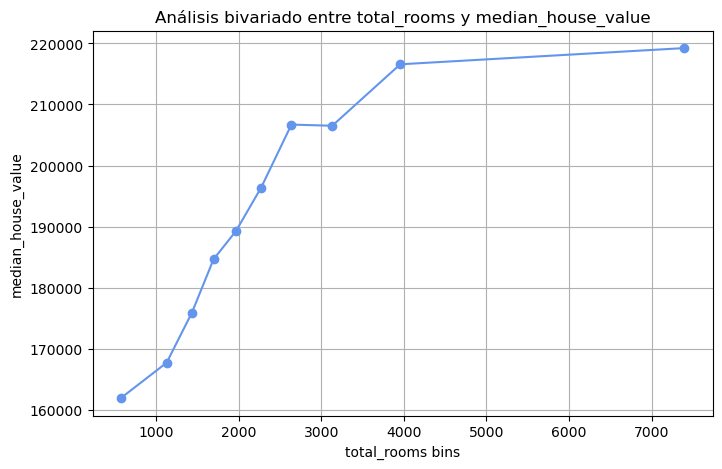

R² Score: 0.0205
MSE: 9,351,447,180.2159
La ecuación de la regresión es: 6.4118 * total_rooms + (175,680.6016)


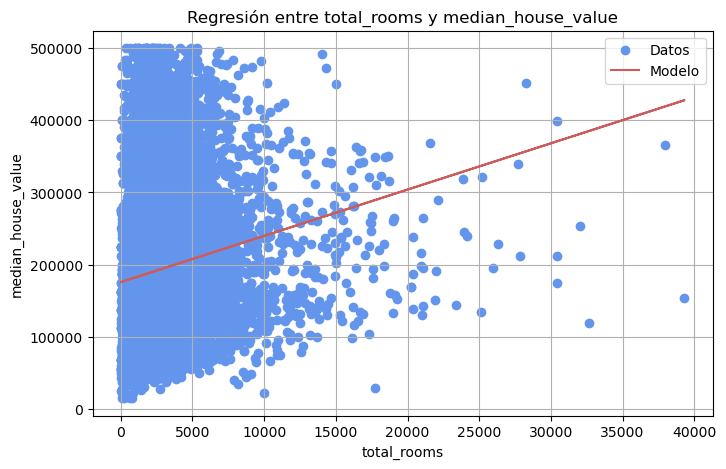

In [5]:
X = df[['total_rooms']]
model = linear_model.LinearRegression().fit(X, y)

df[X.keys()[0] + str("bin")] = pd.qcut(df[X.keys()[0]], q=10, labels=False) + 1
grouped_age = df.groupby((X.keys()[0] + str("bin"))).mean()

plt.figure(figsize=(8,5))
plt.plot(grouped_age[X.keys()[0]].values, grouped_age.median_house_value.values, color=colors[0], marker='o')
plt.xlabel(f"{X.keys()[0]} bins")
plt.ylabel("median_house_value")
plt.title(f"Análisis bivariado entre {X.keys()[0]} y median_house_value")
plt.grid()
plt.show()

r2 = r2_score(y_true=y, y_pred=model.predict(X))
print(f"R² Score: {r2:.4f}")

mse = mean_squared_error(y_true=y, y_pred=model.predict(X))
print(f"MSE: {mse:,.4f}")

print(f"La ecuación de la regresión es: {model.coef_[0]:,.4f} * {X.keys()[0]} + ({model.intercept_:,.4f})")

plt.figure(figsize=(8,5))
plt.scatter(df[X.keys()], df['median_house_value'], color=colors[0], label="Datos")
plt.plot(X, model.predict(X), color=colors[1], label="Modelo")
plt.xlabel(f"{X.keys()[0]}")
plt.ylabel("median_house_value")
plt.title(f"Regresión entre {X.keys()[0]} y median_house_value")
plt.grid()
plt.legend()
plt.show()

El número de cuartos de la casa es una mala variable de predicción, ya que las variables de número de cuartos y precio mediano no tienen una relación lineal, por como se puede ver en el análisis vibariado. Además tiene un R2 de únicamente 0.0205. Gráficmanete, también se puede ver un mal ajuste de la regresión con la distribución de los datos.

### Total bedrooms

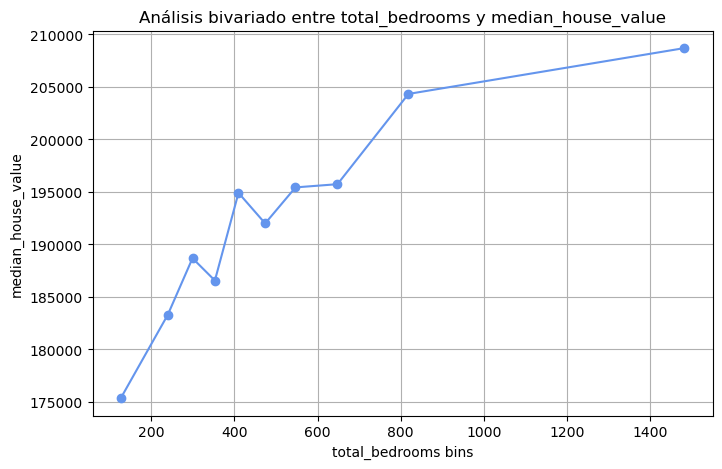

R² Score: 0.0055
MSE: 9,494,371,225.9945
La ecuación de la regresión es: 17.2713 * total_bedrooms + (183,157.5165)


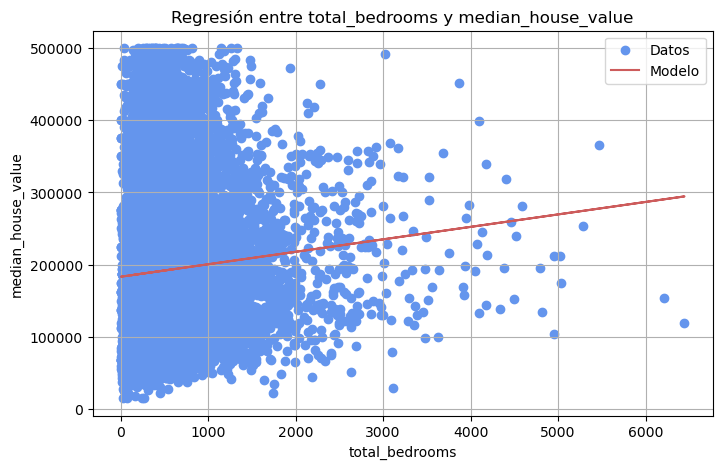

In [6]:
X = df[['total_bedrooms']]
model = linear_model.LinearRegression().fit(X, y)

df[X.keys()[0] + str("bin")] = pd.qcut(df[X.keys()[0]], q=10, labels=False) + 1
grouped_age = df.groupby((X.keys()[0] + str("bin"))).mean()

plt.figure(figsize=(8,5))
plt.plot(grouped_age[X.keys()[0]].values, grouped_age.median_house_value.values, color=colors[0], marker='o')
plt.xlabel(f"{X.keys()[0]} bins")
plt.ylabel("median_house_value")
plt.title(f"Análisis bivariado entre {X.keys()[0]} y median_house_value")
plt.grid()
plt.show()

r2 = r2_score(y_true=y, y_pred=model.predict(X))
print(f"R² Score: {r2:.4f}")

mse = mean_squared_error(y_true=y, y_pred=model.predict(X))
print(f"MSE: {mse:,.4f}")

print(f"La ecuación de la regresión es: {model.coef_[0]:,.4f} * {X.keys()[0]} + ({model.intercept_:,.4f})")

plt.figure(figsize=(8,5))
plt.scatter(df[X.keys()], df['median_house_value'], color=colors[0], label="Datos")
plt.plot(X, model.predict(X), color=colors[1], label="Modelo")
plt.xlabel(f"{X.keys()[0]}")
plt.ylabel("median_house_value")
plt.title(f"Regresión entre {X.keys()[0]} y median_house_value")
plt.grid()
plt.legend()
plt.show()

El número de baños de la casa es una mala variable de predicción, ya que las variables de número de baños y precio mediano no tienen una relación lineal, por como se puede ver en el análisis vibariado. Además tiene un R2 de únicamente 0.0055. Gráficmanete, también se puede ver un mal ajuste de la regresión con la distribución de los datos.

### Population

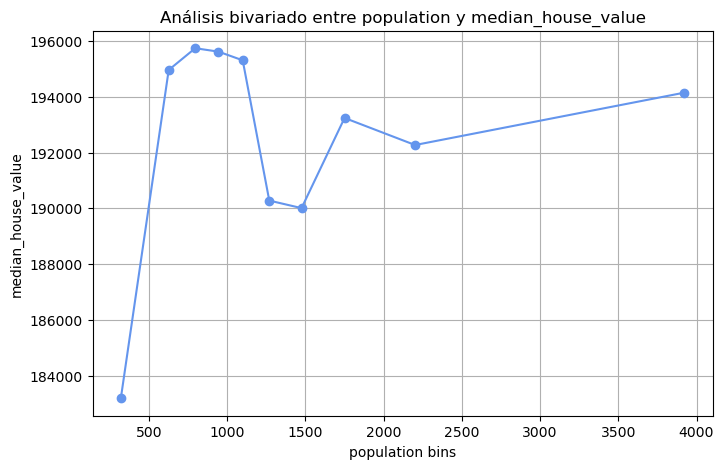

R² Score: 0.0001
MSE: 9,545,687,211.7934
La ecuación de la regresión es: 1.0222 * population + (191,005.0921)


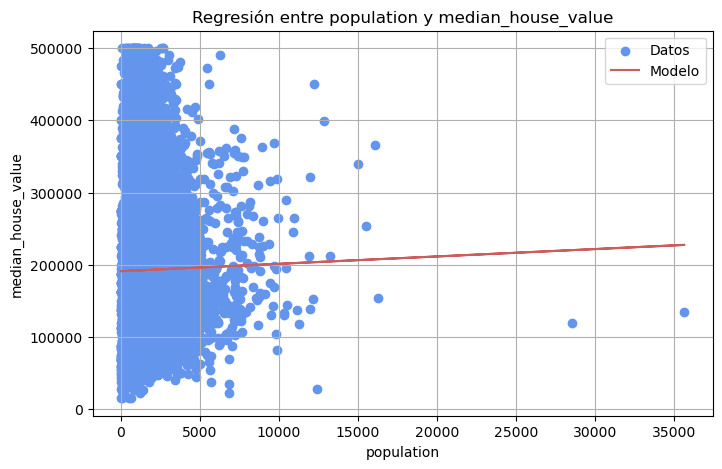

In [7]:
X = df[['population']]
model = linear_model.LinearRegression().fit(X, y)

df[X.keys()[0] + str("bin")] = pd.qcut(df[X.keys()[0]], q=10, labels=False) + 1
grouped_age = df.groupby((X.keys()[0] + str("bin"))).mean()

plt.figure(figsize=(8,5))
plt.plot(grouped_age[X.keys()[0]].values, grouped_age.median_house_value.values, color=colors[0], marker='o')
plt.xlabel(f"{X.keys()[0]} bins")
plt.ylabel("median_house_value")
plt.title(f"Análisis bivariado entre {X.keys()[0]} y median_house_value")
plt.grid()
plt.show()

r2 = r2_score(y_true=y, y_pred=model.predict(X))
print(f"R² Score: {r2:.4f}")

mse = mean_squared_error(y_true=y, y_pred=model.predict(X))
print(f"MSE: {mse:,.4f}")

print(f"La ecuación de la regresión es: {model.coef_[0]:,.4f} * {X.keys()[0]} + ({model.intercept_:,.4f})")

plt.figure(figsize=(8,5))
plt.scatter(df[X.keys()], df['median_house_value'], color=colors[0], label="Datos")
plt.plot(X, model.predict(X), color=colors[1], label="Modelo")
plt.xlabel(f"{X.keys()[0]}")
plt.ylabel("median_house_value")
plt.title(f"Regresión entre {X.keys()[0]} y median_house_value")
plt.grid()
plt.legend()
plt.show()

La población es una mala variable de predicción, ya que las variables de población y precio mediano no tienen una relación lineal, por como se puede ver en el análisis vibariado. Además tiene un R2 de únicamente 0.0001. Gráficmanete, también se puede ver un mal ajuste de la regresión con la distribución de los datos.

### Households

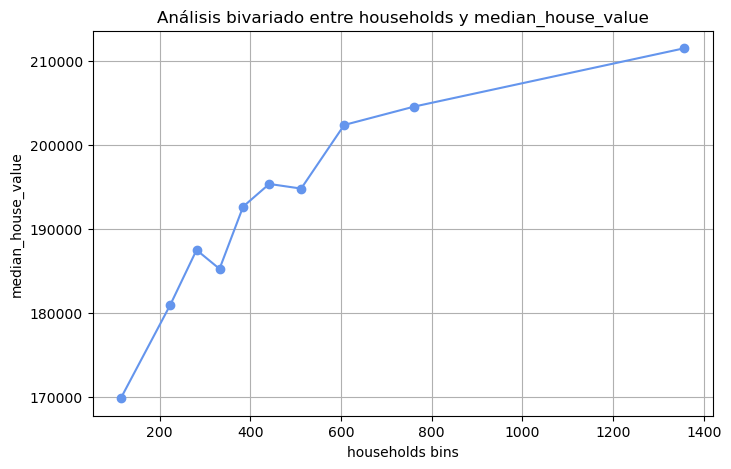

R² Score: 0.0090
MSE: 9,461,083,732.7945
La ecuación de la regresión es: 24.1928 * households + (180,352.8303)


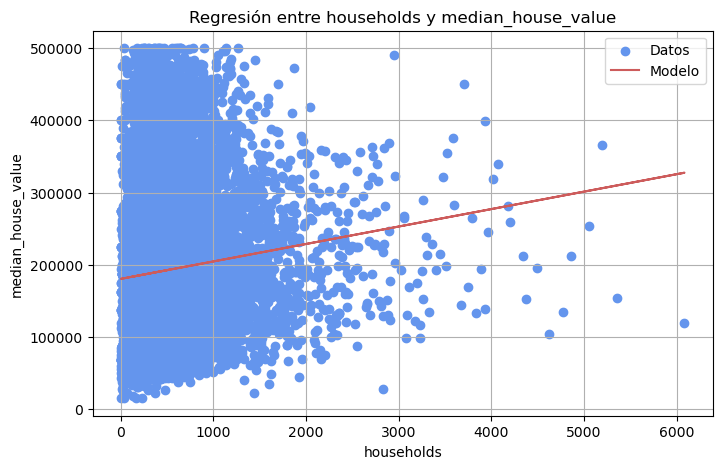

In [8]:
X = df[['households']]
model = linear_model.LinearRegression().fit(X, y)

df[X.keys()[0] + str("bin")] = pd.qcut(df[X.keys()[0]], q=10, labels=False) + 1
grouped_age = df.groupby((X.keys()[0] + str("bin"))).mean()

plt.figure(figsize=(8,5))
plt.plot(grouped_age[X.keys()[0]].values, grouped_age.median_house_value.values, color=colors[0], marker='o')
plt.xlabel(f"{X.keys()[0]} bins")
plt.ylabel("median_house_value")
plt.title(f"Análisis bivariado entre {X.keys()[0]} y median_house_value")
plt.grid()
plt.show()

r2 = r2_score(y_true=y, y_pred=model.predict(X))
print(f"R² Score: {r2:.4f}")

mse = mean_squared_error(y_true=y, y_pred=model.predict(X))
print(f"MSE: {mse:,.4f}")

print(f"La ecuación de la regresión es: {model.coef_[0]:,.4f} * {X.keys()[0]} + ({model.intercept_:,.4f})")

plt.figure(figsize=(8,5))
plt.scatter(df[X.keys()], df['median_house_value'], color=colors[0], label="Datos")
plt.plot(X, model.predict(X), color=colors[1], label="Modelo")
plt.xlabel(f"{X.keys()[0]}")
plt.ylabel("median_house_value")
plt.title(f"Regresión entre {X.keys()[0]} y median_house_value")
plt.grid()
plt.legend()
plt.show()

La cantidad de hogares es una mala variable de predicción, ya que las variables de cantidad de hogares y precio mediano no tienen una relación lineal, por como se puede ver en el análisis vibariado. Además tiene un R2 de únicamente 0.0090. Gráficmanete, también se puede ver un mal ajuste de la regresión con la distribución de los datos.

### Median income

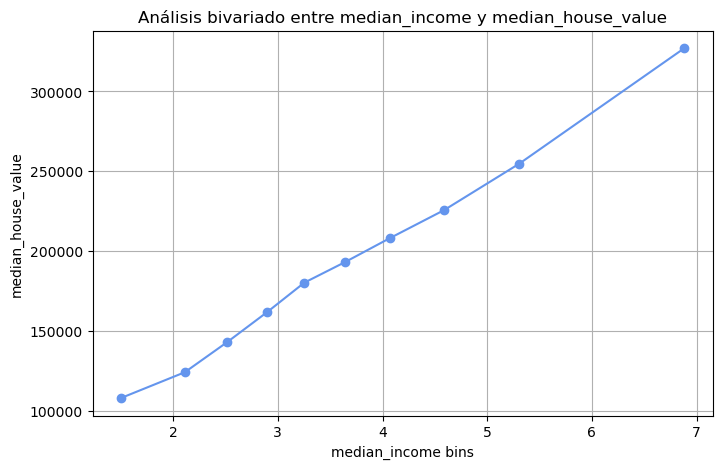

R² Score: 0.4129
MSE: 5,604,611,138.0371
La ecuación de la regresión es: 39,987.0121 * median_income + (45,456.9968)


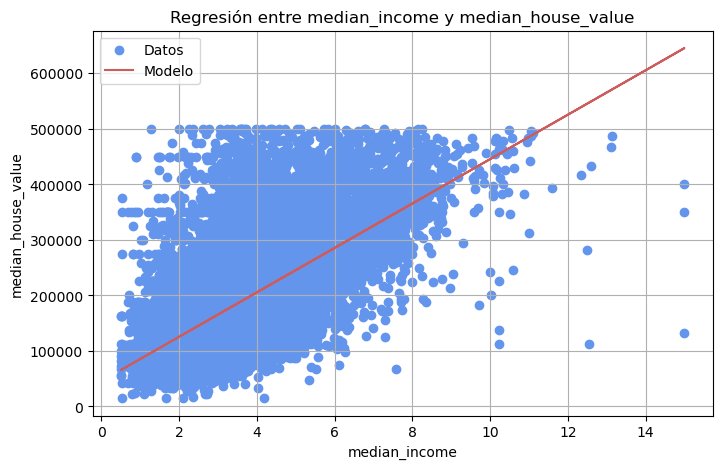

In [9]:
X = df[['median_income']]
model = linear_model.LinearRegression().fit(X, y)

df[X.keys()[0] + str("bin")] = pd.qcut(df[X.keys()[0]], q=10, labels=False) + 1
grouped_age = df.groupby((X.keys()[0] + str("bin"))).mean()

plt.figure(figsize=(8,5))
plt.plot(grouped_age[X.keys()[0]].values, grouped_age.median_house_value.values, color=colors[0], marker='o')
plt.xlabel(f"{X.keys()[0]} bins")
plt.ylabel("median_house_value")
plt.title(f"Análisis bivariado entre {X.keys()[0]} y median_house_value")
plt.grid()
plt.show()

r2 = r2_score(y_true=y, y_pred=model.predict(X))
print(f"R² Score: {r2:.4f}")

mse = mean_squared_error(y_true=y, y_pred=model.predict(X))
print(f"MSE: {mse:,.4f}")

print(f"La ecuación de la regresión es: {model.coef_[0]:,.4f} * {X.keys()[0]} + ({model.intercept_:,.4f})")

plt.figure(figsize=(8,5))
plt.scatter(df[X.keys()], df['median_house_value'], color=colors[0], label="Datos")
plt.plot(X, model.predict(X), color=colors[1], label="Modelo")
plt.xlabel(f"{X.keys()[0]}")
plt.ylabel("median_house_value")
plt.title(f"Regresión entre {X.keys()[0]} y median_house_value")
plt.grid()
plt.legend()
plt.show()

En comparación con las otras 5 variables, el ingreso mediano es una buena variable de predicción, porque las variables de ingreso mediano y precio mediano parecen tener una relación lineal, por como se puede ver en el análisis vibariado. Además tiene un R2 de 0.4129, bastante mayor que el resto de modelos. Gráficmanete, también se puede ver un buen de la regresión con la distribución de los datos.

## Resultado

La mejor variable para explicar el precio de las casas es la variable de ingreso mediano. Esta tiene el R2 más alto de todas las variables numéricas con un valor de 0.4129, es decir que el 41.29% de la variación de los precios es explicada por el ingreso. De igual manera tiene el MSE más bajo con un valor de 5,604,611,138.0371. La regresión lineal sobre el ingreso mediano tiene una ecuación de: $39,987.0121 * Median Income + 45,456.9968$